**Segmentação baseada em regiões**

Segmenta a imagem baseada na detecção de regiões da imagem.

Para isso ela considera os valores de intensidade dos pixels da imagem.

Baseada em contrante. Lê os pixels da imagem e os categoriza conforme sua semelhança com outros pixels. Faz o processo para todos os pixels da imagem. 
O método pode ser implementado realizando a média de todos os pixel da imagem.

O método baseia-se em limiar, o limiar é obtido a partir da média de todos os pixels.

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from google.colab.patches import cv2_imshow

from google.colab import drive

drive.mount('/content/gdrive')

!cp -R /content/gdrive/MyDrive/Mestrado/Cursos\ -\ Udemy/Segmentação\ de\ imagens/Segmentação\ Imagens\ Python\ AZ/imagens imagens/ 

Mounted at /content/gdrive


In [ ]:
def mostrar_imagem(imagem):
  fig = plt.gcf() # Limpa as configurações do gráfico
  fig.set_size_inches(18, 6)
  plt.imshow(imagem, cmap='gray')
  plt.axis('off')
  plt.show()

In [ ]:
img = cv2.imread('/content/imagens/paisagem01.jpg')

In [ ]:
altura, largura = img.shape[:2]

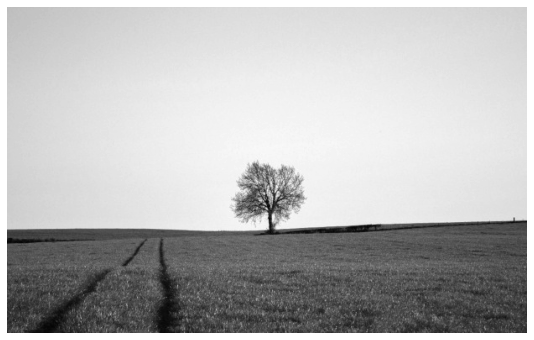

In [ ]:
imgCinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mostrar_imagem(imgCinza)

In [ ]:
# Convertendo da matriz para um vetor
img_flat = imgCinza.reshape(altura * largura # Total de pixels
                            )

In [ ]:
media = img_flat.mean()
media

152.5262874201841

In [ ]:
num_pixels = len(img_flat)

In [ ]:
# Realizando a segmentação
for i in range(num_pixels):
  if img_flat[i] > media:
    img_flat[i] = 255
  else:
    img_flat[i] = 0

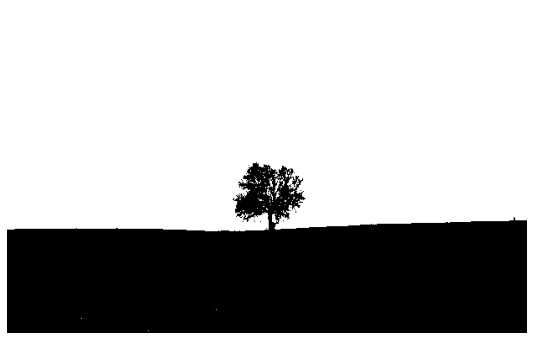

In [ ]:
seg_regiao = img_flat.reshape(altura, largura)
mostrar_imagem(seg_regiao)

In [ ]:
def flatten_img(img):
  altura, largura = img.shape[0], img.shape[1]
  return img.reshape(altura * largura)

In [ ]:
imgCinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_flat = flatten_img(imgCinza)

In [ ]:
from skimage.color import rgb2gray

In [ ]:
imgCinza = rgb2gray(img) # Os pixels ficam para a escala 0 e 1
img_flat = flatten_img(imgCinza)

In [ ]:
def segmenta2regioes(img):
  pixels = flatten_img(img.copy())
  media = pixels.mean()
  for i in range(len(pixels)):
    if pixels[i] > media:
      pixels[i] = 255
    else:
      pixels[i] = 0
  seg_regiao = pixels.reshape(img.shape[0], img.shape[1])

  return seg_regiao

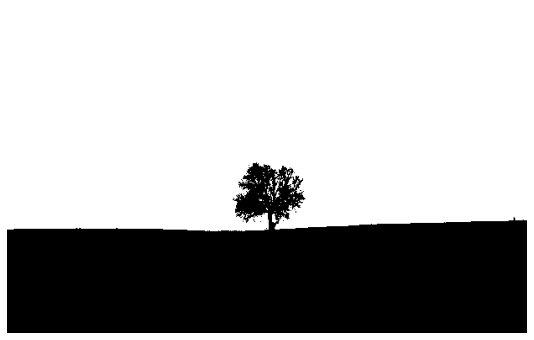

In [ ]:
seg_regiao = segmenta2regioes(imgCinza)
mostrar_imagem(seg_regiao)

In [ ]:
# 3 regiões
def segmenta3regioes(img):
  pixels = flatten_img(img.copy())
  for i in range(len(pixels)):
    if pixels[i] > 0.66:
      pixels[i] = 2
    elif pixels[i] > 0.33:
      pixels[i] = 1
    else:
      pixels[i] = 0
  seg_regiao = pixels.reshape(img.shape[0], img.shape[1])

  return seg_regiao

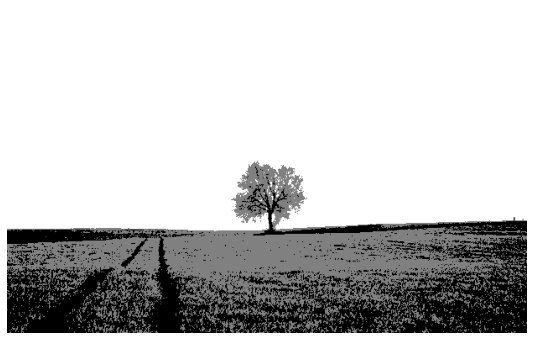

In [ ]:
seg_regiao = segmenta3regioes(imgCinza)
mostrar_imagem(seg_regiao)

In [ ]:
# 4 regiões
def segmenta4regioes(img):
  pixels = flatten_img(img.copy())
  for i in range(len(pixels)):
    if pixels[i] > 0.75:
      pixels[i] = 3
    elif pixels[i] > 0.5:
      pixels[i] = 2
    elif pixels[i] > 0.25:
      pixels[i] = 1
    else: 
      pixels[i] = 0
  seg_regiao = pixels.reshape(img.shape[0], img.shape[1])

  return seg_regiao

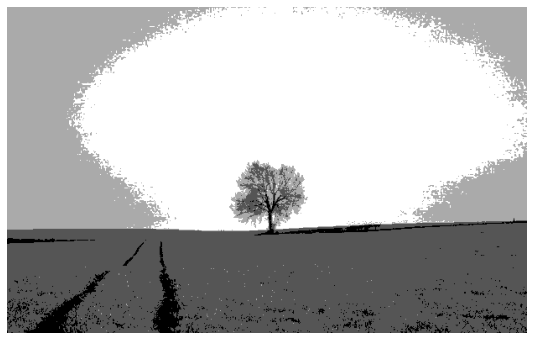

In [ ]:
seg_regiao = segmenta4regioes(imgCinza)
mostrar_imagem(seg_regiao)

In [ ]:
# 5 regiões
def segmenta5regioes(img):
  pixels = flatten_img(img.copy())
  for i in range(len(pixels)):
    if pixels[i] > 0.8:
      pixels[i] = 4
    elif pixels[i] > 0.6:
      pixels[i] = 3
    elif pixels[i] > 0.4:
      pixels[i] = 2
    elif pixels[i] > 0.2:
      pixels[i] = 1
    else:
      pixels[i] = 0
  seg_regiao = pixels.reshape(img.shape[0], img.shape[1])

  return seg_regiao

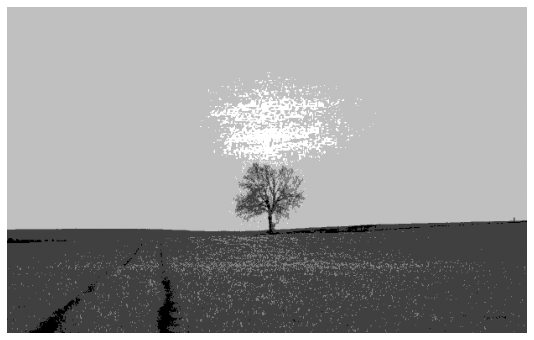

In [ ]:
seg_regiao = segmenta5regioes(imgCinza)
mostrar_imagem(seg_regiao)

In [60]:
def segmentacao_regiao(img, cmap = 'gray'):
  original = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  imgCinza = rgb2gray(img)

  s2 = segmenta2regioes(imgCinza)
  s3 = segmenta3regioes(imgCinza)
  s4 = segmenta4regioes(imgCinza)
  s5 = segmenta5regioes(imgCinza)

  titulos = ['Imagem Original', '2 regiões', '3 regiões', '4 regiões', '5 regiões', 'Original 1 canal']
  imagens = [original, s2, s3, s4, s5, imgCinza]

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  for i in range(len(imagens)):
    plt.subplot(2,3,i+1)
    plt.imshow(imagens[i], cmap)
    plt.title(titulos[i])
    plt.xticks([])
    plt.yticks([])

  plt.subplots_adjust(wspace = 0.05) # Espaçamento entre as imagens
  plt.show() 

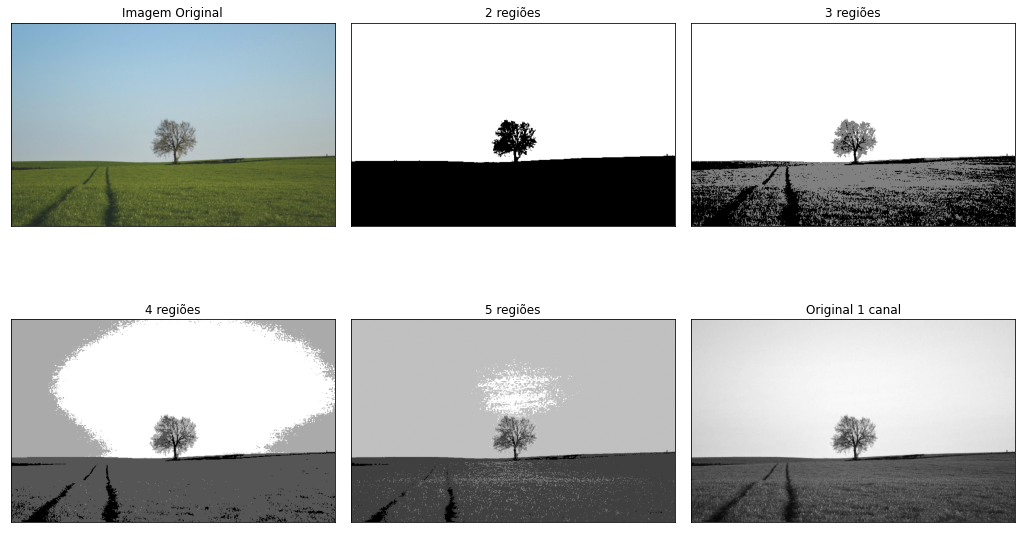

In [63]:
img = cv2.imread('/content/imagens/paisagem01.jpg')
segmentacao_regiao(img)

In [64]:
# Melhor resultado = 3 regiões

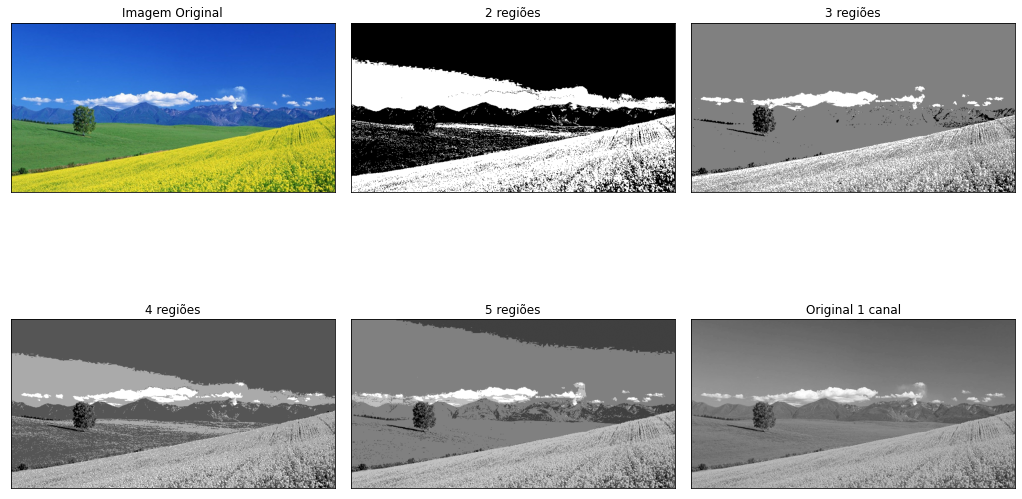

In [65]:
img = cv2.imread('/content/imagens/paisagem02.jpg') 
segmentacao_regiao(img)

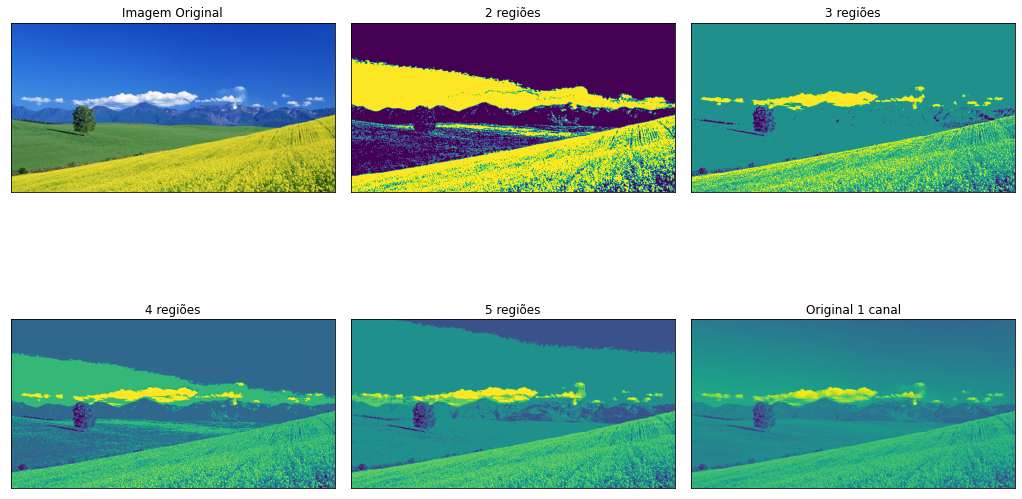

In [66]:
img = cv2.imread('/content/imagens/paisagem02.jpg') 
segmentacao_regiao(img, cmap='viridis')

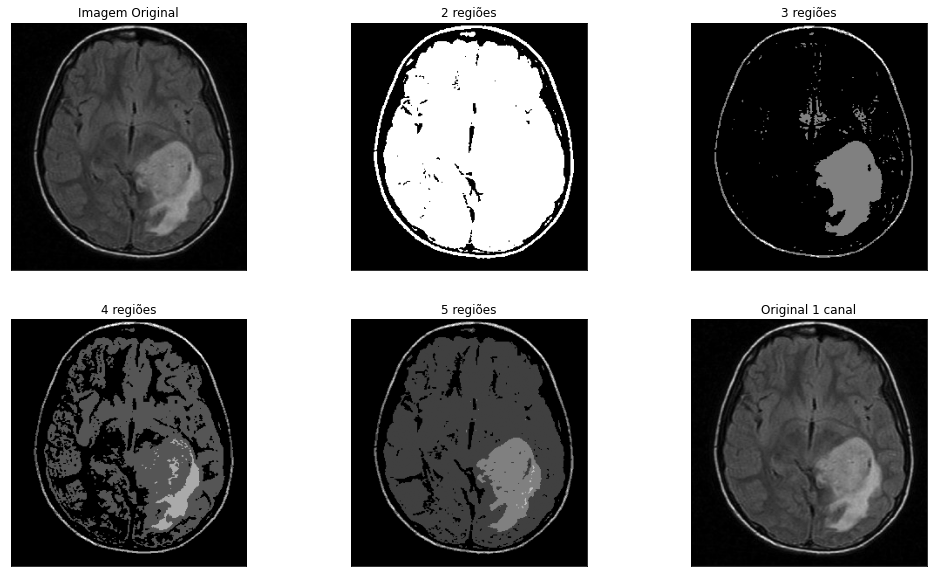

In [68]:
img = cv2.imread('/content/imagens/ct-scan.jpg') 
segmentacao_regiao(img)

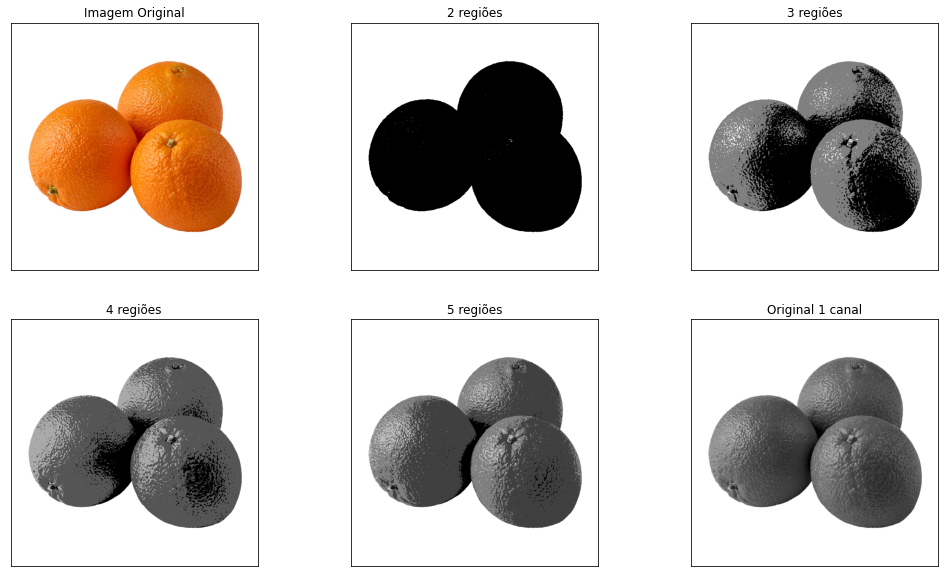

In [69]:
img = cv2.imread('/content/imagens/laranjas.jpg') 
segmentacao_regiao(img)

**Método genético para realizar a segmentação em n regiões**

In [184]:
def segmentacao_N_regioes(img, nRegioes):
  imgCinza = rgb2gray(img)

  altura, largura = img.shape[0], img.shape[1]
  img = np.zeros((altura, largura))

  LIMITE = 1.0

  passo = LIMITE / nRegioes

  iterations = np.arange(passo,LIMITE,passo)

  for i in range(0, altura):
    for j in range(0, largura):
      iterations = np.arange(passo,LIMITE,passo)
      for index, k in enumerate(iterations[::-1]):
        if imgCinza[i,j] > k:
          img[i,j] = len(iterations) - index + 1
          break

  return img

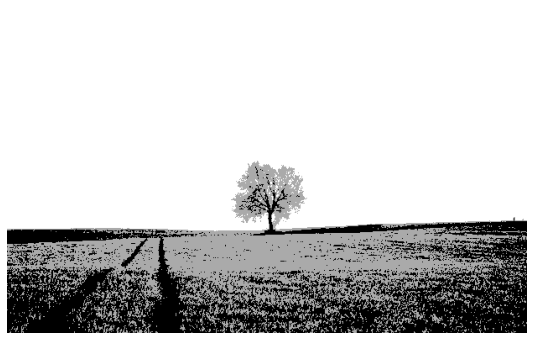

In [185]:
seg_regiao = segmentacao_N_regioes(img, 3)
mostrar_imagem(seg_regiao)

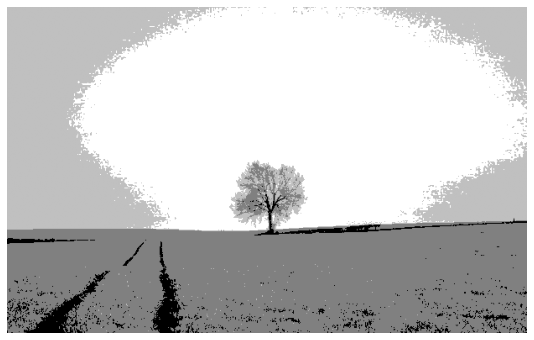

In [187]:
seg_regiao = segmentacao_N_regioes(img, 4)
mostrar_imagem(seg_regiao)

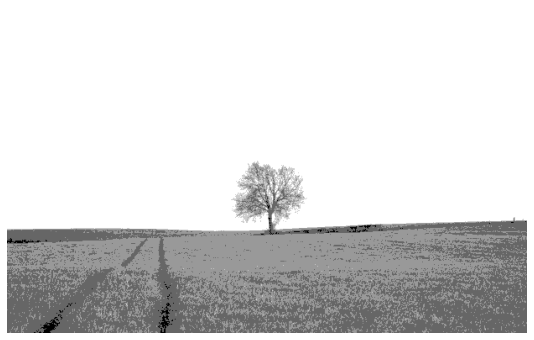

In [190]:
seg_regiao = segmentacao_N_regioes(img, 6)
mostrar_imagem(seg_regiao)

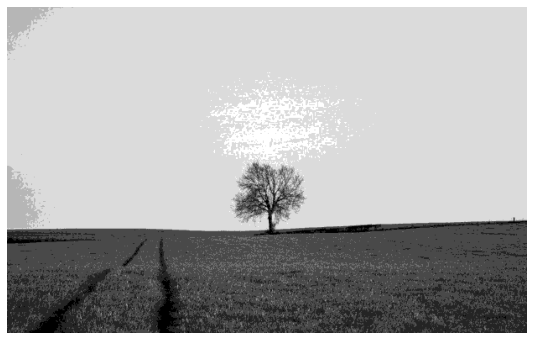

In [191]:
seg_regiao = segmentacao_N_regioes(img, 10)
mostrar_imagem(seg_regiao)